In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
jack = pd.read_csv(r"C:\Users\ethan\Downloads\titanic_dataset.csv")

In [3]:
jack.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
jack.set_index('PassengerId', inplace = True)

In [5]:
jack.shape

(891, 11)

In [6]:
jack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
jack.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Imputing

#### Imputing  Age

Creating a seperate column named Salutation so that to seperate people based on salutation and filling null values.

In [8]:
jack['Salutation'] = jack.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
jack['Salutation'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [9]:
#Mr_arr = jack[jack['Name'].str.contains('Mr')].Age.values
#Miss_arr = jack[jack['Name'].str.contains('Miss')].Age.values
#Master_arr = jack[jack['Name'].str.contains('Master')].Age.values
#Don_arr = jack[jack['Name'].str.contains('Don')].Age.values
#Rev_arr = jack[jack['Name'].str.contains('Rev')].Age.values
#Dr_arr = jack[jack['Name'].str.contains('Dr')].Age.values
#Mme_arr = jack[jack['Name'].str.contains('Mme')].Age.values
#Ms_arr = jack[jack['Name'].str.contains('Ms')].Age.values
#Major_arr = jack[jack['Name'].str.contains('Major')].Age.values
#Lady_arr = jack[jack['Name'].str.contains('Lady')].Age.values
#Sir_arr = jack[jack['Name'].str.contains('Sir')].Age.values
#Mlle_arr = jack[jack['Name'].str.contains('Mlle')].Age.values
#Col_arr = jack[jack['Name'].str.contains('Col')].Age.values
#Capt_arr = jack[jack['Name'].str.contains('Capt')].Age.values
#the_Countess_arr = jack[jack['Name'].str.contains('the Countess')].Age.values
#Jonkheer_arr =jack[jack['Name'].str.contains('Jonkheer')].Age.values


In [10]:
#np.isnan(Mr_arr).sum(),np.isnan(Miss_arr).sum(),np.isnan(Master_arr).sum(),np.isnan(Don_arr).sum(),np.isnan(Rev_arr).sum(),np.isnan(Dr_arr).sum(),np.isnan(Mme_arr).sum(),np.isnan(Ms_arr).sum(),np.isnan(Major_arr).sum(),np.isnan(Lady_arr).sum(),np.isnan(Sir_arr).sum(),np.isnan(Mlle_arr).sum(),np.isnan(Col_arr).sum(),np.isnan(Capt_arr).sum(),np.isnan(the_Countess_arr).sum(),np.isnan(Jonkheer_arr).sum()

In [11]:
Mr = jack[jack['Salutation'] == 'Mr']
Miss = jack[jack['Salutation'] == 'Miss']
Master = jack[jack['Salutation'] == 'Master'] 
Dr = jack[jack['Salutation'] == 'Dr']
Sir = jack[jack['Salutation'] == 'Sir']
Mrs = jack[jack['Salutation'] == 'Mrs']


In [12]:
#Dealing with Mr
Mr['Age'] = Mr['Age'].fillna(Mr['Age'].mean())
jack.update(Mr)

#Dealing with Miss
Miss['Age'] = Miss['Age'].fillna(Miss['Age'].mean())
jack.update(Miss)

#Dealing with Master
Master['Age'] = Master['Age'].fillna(Master['Age'].mean())
jack.update(Master)

#Dealing with Dr
Dr['Age'] = Dr['Age'].fillna(Dr['Age'].mean())
jack.update(Dr)

#Dealing with Mrs
Mrs['Age'] = Mrs['Age'].fillna(Mrs['Age'].mean())
jack.update(Mrs)

In [13]:
jack['Age'].isna().sum()

0

#### Imputing Cabin

In [14]:
jack['Cabin'] = jack['Cabin'].fillna('Erand, probably')

#### Imputing Embarked

In [15]:
jack['Embarked'].mode()[0]

'S'

In [16]:
jack['Embarked'] = jack['Embarked'].fillna('S')

In [17]:
jack.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
Salutation    0
dtype: int64

## Handling Outliers

### Handling outliers in Age

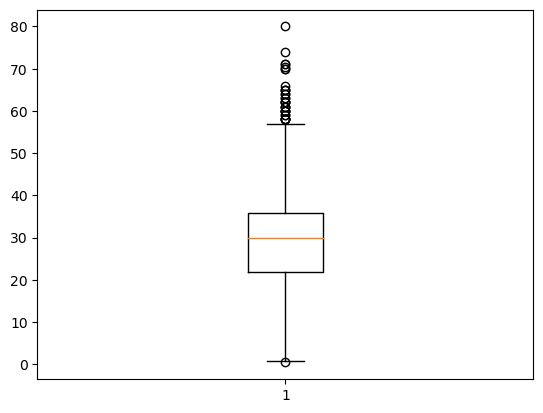

In [30]:
plt.boxplot(jack['Age'])
plt.show()

In [31]:
q1 = jack['Age'].quantile(q= 0.25)
q2 = jack['Age'].quantile(q= 0.50)
q3 = jack['Age'].quantile(q= 0.75)

In [33]:
iqr= q3-q1
iqr

14.12417554540842

In [41]:
lower = q1 - 2.2*iqr
upper = q3 + 2.2*iqr
upper, lower

(66.97133434804667, -9.2992135971588)

In [42]:
outlier= []
for x in jack['Age']:
    if x>upper or x<lower:
        outlier.append(x)

In [43]:
outlier

[71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]

In [44]:
index = jack['Age'] > upper
jack.loc[index].index

Int64Index([97, 117, 494, 631, 673, 746, 852], dtype='int64', name='PassengerId')

In [45]:
jack.drop([97, 117, 494, 631, 673, 746, 852], inplace = True)

In [46]:
jack.shape

(884, 12)

### Handling outliers in Fare

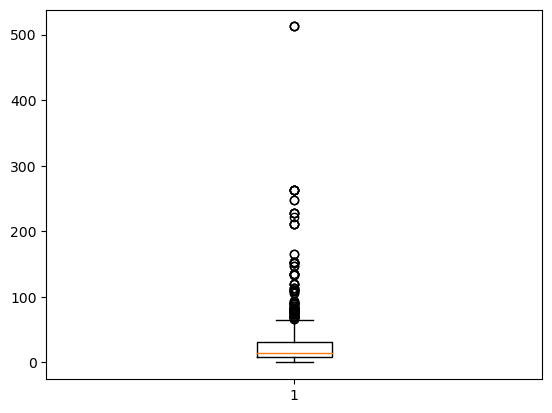

In [47]:
plt.boxplot(jack['Fare'])
plt.show()

In [48]:
Q1 = jack['Fare'].quantile(q= 0.25)
Q2 = jack['Fare'].quantile(q= 0.50)
Q3 = jack['Fare'].quantile(q= 0.75)
Q1,Q2,Q3

(7.9177, 14.4542, 31.0)

In [49]:
IQR= Q3-Q1
IQR

23.0823

In [62]:
lowerF = Q1 - 2*IQR
upperF = Q3 + 2*IQR
upperF, lowerF

(77.16460000000001, -38.2469)

In [63]:
outlier2= []
for x in jack['Fare']:
    if x>upperF or x<lowerF:
        outlier2.append(x)

In [64]:
indexF = jack['Fare'] > upperF
jack.loc[indexF].index

Int64Index([ 28,  32,  35,  62,  63,  89, 103, 119, 125, 140, 196, 216, 225,
            231, 246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300,
            306, 307, 308, 311, 312, 319, 320, 326, 333, 335, 338, 342, 374,
            376, 378, 381, 391, 394, 413, 436, 439, 446, 454, 485, 487, 497,
            499, 505, 506, 521, 528, 538, 545, 551, 558, 559, 582, 586, 588,
            592, 610, 628, 660, 661, 680, 690, 699, 701, 709, 717, 731, 738,
            742, 743, 760, 764, 766, 780, 790, 803, 821, 830, 836, 850, 857,
            880],
           dtype='int64', name='PassengerId')

In [65]:
jack.drop([ 28,  32,  35,  62,  63,  89, 103, 119, 125, 140, 196, 216, 225,
            231, 246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300,
            306, 307, 308, 311, 312, 319, 320, 326, 333, 335, 338, 342, 374,
            376, 378, 381, 391, 394, 413, 436, 439, 446, 454, 485, 487, 497,
            499, 505, 506, 521, 528, 538, 545, 551, 558, 559, 582, 586, 588,
            592, 610, 628, 660, 661, 680, 690, 699, 701, 709, 717, 731, 738,
            742, 743, 760, 764, 766, 780, 790, 803, 821, 830, 836, 850, 857,
            880], inplace = True)

In [66]:
jack.shape

(792, 12)

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
min_max = jack['Survived']
scaler = MinMaxScaler(feature_range=(0, 1))